<a href="https://colab.research.google.com/github/Rob7799/Intro_to_SciKitLearn/blob/main/Introduction_To_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Typical scikit-learn Workflow

In [1]:
#Standard Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **Random Forest Classifier workflow for classifying Heart Disease**

In [2]:
#Get the data ready
heart_disease=pd.read_csv("/content/heart-disease.csv")

In [3]:
heart_disease.head() #The column titles are called Feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#create x(all the feature column)
x=heart_disease.drop("target", axis=1)

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
#Create the y(The Target Column)
y=heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
y.head(),y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64, 1    165
 0    138
 Name: target, dtype: int64)

In [8]:
#train the model with 80 percent of the data and check against the other 20 percent

In [9]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_Train,X_test,y_train,y_test=train_test_split(x,y)

In [10]:
X_Train.shape,X_test.shape

((227, 13), (76, 13))

In [11]:
len(x)

303

# Choose The model and Hyperparameters
# hyperparameters are like knobs on an oven, you can tune to cook your favorite dish

In [12]:
from sklearn.ensemble import RandomForestClassifier
truck=RandomForestClassifier()

# Fit the model to the data and use it to make prediction

In [13]:
truck.fit(X_Train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
#Use the model to make a prediction
y_preds=truck.predict(X_test)

In [15]:
y_preds

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

# Evaluate the Model


In [16]:
truck.score(X_Train,y_train) #100% because the model used this for training

1.0

In [17]:
truck.score(X_test,y_test)

0.868421052631579

# Experiment To Improve

In [18]:
#Try different number of estimators (Trees)
np.random.seed(42)
for i in range(10,100,10):
  print("Trying model with {} estimators".format(i))
  model=RandomForestClassifier(n_estimators=i).fit(X_Train,y_train)
  print("Model accuracy on Test set: {}% ".format(model.score(X_test,y_test)*100))
  print("")

Trying model with 10 estimators
Model accuracy on Test set: 84.21052631578947% 

Trying model with 20 estimators
Model accuracy on Test set: 84.21052631578947% 

Trying model with 30 estimators
Model accuracy on Test set: 81.57894736842105% 

Trying model with 40 estimators
Model accuracy on Test set: 84.21052631578947% 

Trying model with 50 estimators
Model accuracy on Test set: 85.52631578947368% 

Trying model with 60 estimators
Model accuracy on Test set: 85.52631578947368% 

Trying model with 70 estimators
Model accuracy on Test set: 85.52631578947368% 

Trying model with 80 estimators
Model accuracy on Test set: 86.8421052631579% 

Trying model with 90 estimators
Model accuracy on Test set: 84.21052631578947% 



## **Getting the Data Ready**
1. Splitting the data into features (X) and Labels (y)
2. Filling Missing values
3. Converting non-numerical values to numerical values


In [19]:
#Splitting the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=heart_disease.drop("target",axis=1) #axis=1 means column

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y=heart_disease["target"]

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
#splitting the data into training set and test set 

In [25]:
from sklearn.model_selection import train_test_split  #Features (x) is always capitalized

X_Train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)



In [26]:
X_Train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
len(X)

303

# **Make sure it's all numerical **

In [28]:
car_sales=pd.read_csv("/content/car-sales-extended.csv")

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
X=car_sales.drop("Price",axis=1)

In [32]:
y=car_sales["Price"]

In [33]:
X_Train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [34]:
#Try to predict with random forest on price column
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()

#model.fit(X_Train,y_train) 

#This DID NOT WORK BECAUSE WE NEED TO CLEAN THE DATA AND CONVERT STRING DATA TO NUMERICAL 

In [35]:
#Turn the categories into numbers (toyota=2, Honda=4, BMW=4) (red=1, blue=2, etc.)

In [36]:
#Turn the categories (make and Color) into numbers
from sklearn.preprocessing import OneHotEncoder #changes categories to numbers
from sklearn.compose import ColumnTransformer

Categorical_features=["Make","Colour","Doors"] #doors is an integor but is still a category 
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,Categorical_features)], #put into a list of tuples
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)


In [37]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
#Lets Refit the model 
np.random.seed(42)
X_Train,X_test,y_train,y_test=train_test_split(transformed_X,y,
                                               test_size=0.2)
model.fit(X_Train,y_train)
                                          

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
model.score(X_test,y_test)

0.0

# **What if there is missing values**
1. Fill them with some given value
2. Remove them

In [40]:
#Import a dataset containing Missing Values
car_sales_missing=pd.read_csv("/content/car-sales-extended-missing-data.csv")

In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
#Function that checks how many null values in each column
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# from sklearn.preprocessing import OneHotEncoder #changes categories to numbers
# from sklearn.compose import ColumnTransformer    

# Categorical_features=["Make","Colour","Doors"] #doors is an integor but is still a category 
# one_hot=OneHotEncoder()
# transformer=ColumnTransformer([("one_hot",one_hot,Categorical_features)], #put into a list of tuples
#                               remainder="passthrough")
# transformed_X=transformer.fit_transform(car_sales_missing) #WILL NOT WORK WITH NULL VALUES

# **Fill missing data with Pandas**

In [44]:
#Fill The "Make", "Colour", etc. that are missing with something,   THIS IS THE PANDAS WAY
car_sales_missing["Make"].fillna("missing",inplace=True)

In [45]:
car_sales_missing["Colour"].fillna("missing",inplace=True)

In [46]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

In [47]:
car_sales_missing["Doors"].fillna(4,inplace=True)


In [48]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
car_sales_missing.dropna(inplace=True) #don't need define what we're dropping because no more missing data. Except for the price



In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing)

950

In [52]:
Categorical_features=["Make","Colour","Doors"] #doors is an integor but is still a category 
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,Categorical_features)], #put into a list of tuples
                              remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)

In [53]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# **Filling the missing data and transforming categorical data with SciKit-Learn**
SimpleImputer() which will allow you to do a similar thing like Pandas


In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
car_sales_missing2=pd.read_csv("/content/car-sales-extended-missing-data.csv")

In [56]:
car_sales_missing2

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [57]:
car_sales_missing2.isna().sum() #missing data sums

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
#Drop the rows with missing in "Price" column
car_sales_missing2.dropna(subset=["Price"],inplace=True)

In [59]:
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [60]:
#Split X, y

In [61]:
X=car_sales_missing2.drop("Price",axis=1)
y=car_sales_missing2["Price"]

In [62]:
X_Train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2)

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [64]:
#Fill Categorical values with "missing" and numerical with mean

In [65]:
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")


In [66]:
#Define different column Features
categorical_features=["Make","Colour"]
door_feature=["Doors"]
numerical_feature=["Odometer (KM)"]


In [67]:
imputer=ColumnTransformer([("cat_imputer",cat_imputer,categorical_features),
                           ("door_imputer",door_imputer,door_feature),
                           ("num_imputer",num_imputer,numerical_feature)])
#Fill Train and test values separately 




In [68]:
filled_X_Train=imputer.fit_transform(X_Train)
filled_X_test=imputer.transform(X_test)

In [69]:
filled_X_Train

array([['Toyota', 'White', 4.0, 137628.0],
       ['Toyota', 'Blue', 4.0, 135080.0],
       ['Honda', 'Blue', 4.0, 166595.0],
       ...,
       ['Toyota', 'Red', 4.0, 248634.0],
       ['Honda', 'Red', 4.0, 95243.0],
       ['missing', 'White', 3.0, 155144.0]], dtype=object)

In [70]:
#Get teh transformed data array's back into DataFrame

In [71]:
car_sales_filled_train=pd.DataFrame(filled_X_Train, columns=["Make","Colour","Doors","Odometer (KM)"])

In [72]:
car_sales_filled_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,White,4,137628
1,Toyota,Blue,4,135080
2,Honda,Blue,4,166595
3,Toyota,White,4,117637
4,Honda,Blue,4,186146
...,...,...,...,...
755,Honda,Blue,4,152547
756,Toyota,Blue,4,247601
757,Toyota,Red,4,248634
758,Honda,Red,4,95243


In [73]:
car_sales_filled_test=pd.DataFrame(filled_X_test, columns=["Make","Colour","Doors","Odometer (KM)"])

In [74]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [75]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [76]:
#Now let's apply one hot enconding 

from sklearn.preprocessing import OneHotEncoder #changes categories to numbers
from sklearn.compose import ColumnTransformer

Categorical_features=["Make","Colour","Doors"] #doors is an integor but is still a category 
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,Categorical_features)], #put into a list of tuples
                              remainder="passthrough")
transformed_X_Train=transformer.fit_transform(car_sales_filled_train)
transformed_X_test=transformer.transform(car_sales_filled_test)

In [77]:
transformed_X_Train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.37628e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.35080e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.66595e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48634e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.52430e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.55144e+05]])

In [78]:
#Let's apply the model

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

#let's fit

model.fit(transformed_X_Train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
model.score(transformed_X_test,y_test)

0.288764977100731

# **Choosing The RIght Estimator/algorithm for your Problem**

# Picking a Machine Learning Model for a regression Problem


In [80]:
#Import The Boston housing dataset
import pandas as pd

from sklearn.datasets import load_boston
boston=load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [81]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])  #Data and Feature_names act as dictionary key to call data and column names
boston_df["target"]=pd.Series(boston["target"]) #Feature names essentially x values, and target is the y values
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
len(boston_df)

506

In [83]:
boston_df.isna().sum() #No missing data, all zero

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [84]:
#Check SciKit choosing right Estimator from map (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [85]:
#Import the Ridge Model Class from the linear_model module
from sklearn.linear_model import Ridge
np.random.seed(42)

#Create the data
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

#Split
X_train,X_test,y_train,y_test=train_test_split(X,y, 
                                               test_size=0.2)

#initiate and fit the model
model=Ridge()
model.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
model.score(X_test,y_test)

0.6662221670168522

# If Ridge model not that accurate, use the Ensemble Regressor
 Import the Random Forest Regressor from the ensemble module


In [87]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42) #makes sure the accuracy is the same everyday it is run. 

In [88]:


#Create the data
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

#Split
X_train,X_test,y_train,y_test=train_test_split(X,y, 
                                               test_size=0.2)

#initiate and fit the model
model=RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
model.score(X_test,y_test)

0.873969014117403

In [90]:
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
model.score(X_test,y_test)

0.894871934670487

# **Picking up a model for a Classification Problem**

In [93]:
heart_disease=pd.read_csv("/content/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
len(heart_disease)

303

In [95]:
#We are predicting a category, do they have heart disease


In [96]:
from sklearn.svm import LinearSVC

In [97]:
np.random.seed(42)

X=heart_disease.drop("target",axis=1) #create date
y=heart_disease["target"]


In [98]:
#Split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)


In [99]:
clf=LinearSVC(max_iter=1000) #iter = iteration    clf=the model
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [100]:
clf.score(X_test,y_test)

0.8688524590163934

In [101]:
#Not accurate enough, move to Kneighbors classifer

In [102]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
model.score(X_test,y_test)

0.8360655737704918

# **Fit the Model to Data and using it to make predictions**


In [104]:
#Calling the Fit Method () will cause the Machine Learning algorithm to attempt to find the patterns between X and y. Or if there's no y, it will only find the pattern within X. 

# Making Predictions using a Machine Learning Model
1. Predict
2. Accuracy Score

In [105]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [106]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [107]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [108]:
y_preds=clf.predict(X_test)

In [109]:
np.mean(y_preds==y_test) #the precentage of similiarity between the 2 tests

0.8688524590163934

In [110]:
from sklearn.metrics import accuracy_score #Other way to check accuracy
accuracy_score(y_test,y_preds)

0.8688524590163934

# **Evaluating a Model**

1. Score () Method
2. GridSearchCV

In [111]:
#general Model evaluation with Score()

In [112]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)

In [114]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.8524590163934426

In [115]:
from sklearn.model_selection import cross_val_score #Cross Validation, actual name is "K-fold Cross Validation" (by default 5 different test, can be more though)
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [116]:
cross_val_score(clf,X,y,cv=10) #with 10 different types of test

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [117]:
clf_cross_validation_score=np.mean((cross_val_score(clf,X,y,cv=5)))
clf_cross_validation_score

0.8281420765027322

# Classification Model Evaluation Metrics
1. Accuracy
2. Area under ROC Curve 
3. Confusion Matrix
4. Classification Report

In [118]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

In [119]:
#Accuracy as percentage
print("Heart disease Classifier Accuracy: {}%".format(clf.score(X_test,y_test)*100))

Heart disease Classifier Accuracy: 85.24590163934425%


# Area under Receiver Operation Characteristics (ROC) Curve
It's usually reffered to as AUC and the curve they are talking about is the Receiver Operating Characteristics or ROC for Short


Roc curves are a comparison of true positive rate(tpr) versus false positive rate(fpr)

for clarity:
1. True Positive: model predicts 1 when truth is 1
2. False Positive: model predicts 1 when truth is 0
3. True Negative: model predicts 0 when truth is 0
4. False Negative: model predicts 0 when truth is 1 


In [120]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)
y_probs #1st column is 0 or (negative class) and second column is 1 or Positive Class

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [121]:
#Keep the probabilites of the Positive class only - so only chossing the 2nd column or the positive ones
y_probs=y_probs[:,1]

In [122]:
y_probs

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [123]:
#Calculate the FPR, TPR, thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

In [124]:
fpr #Fale Positive Rate

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [125]:
tpr # True Positive Rate

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

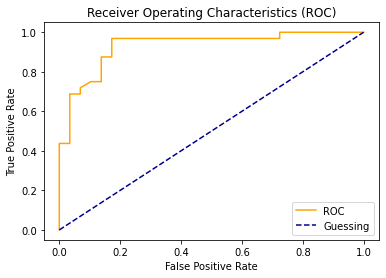

In [126]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):  #plot ROC Curve
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
  #customize the plot
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristics (ROC)")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [127]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs)

0.9304956896551724

In [128]:
#plot perfect ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)

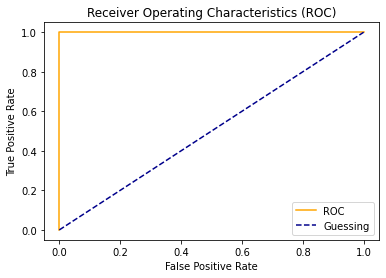

In [129]:
plot_roc_curve(fpr,tpr)

In [130]:
roc_auc_score(y_test,y_test)

1.0

#Confusion Matrix
A confusion matrix is a quick way to create compare the lablels a model predicts
and the actual labels it was supposed to predict. Giving you an idea of where the model is getting confused

In [131]:
from sklearn.metrics import confusion_matrix  #READ UP on CONFUSION MATRIX to better
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [132]:
pd.crosstab(y_test,y_preds,
            rownames=["Actual label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual label,,
0,24,5
1,4,28


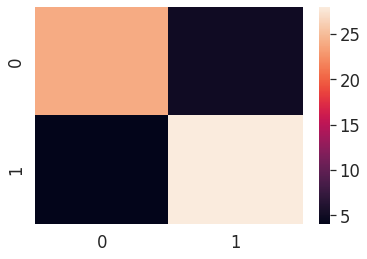

In [133]:
#Plot a confusion Matrix
import seaborn as sns
sns.set(font_scale=1.5)
#create a confusion matrix
confu_mat=confusion_matrix(y_test,y_preds)

sns.heatmap(confusion_matrix(y_test,y_preds))

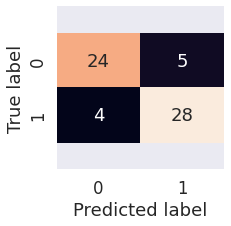

In [134]:
def plot_conf_mat(conf_mat):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confu_mat,
                 annot=True,
                 cbar=False)
  
  plt.xlabel("Predicted label")
  plt.ylabel("True label")

  bottom,top=ax.get_ylim()
  ax.set_ylim(bottom+.5,top-.5)
plot_conf_mat(confu_mat)

# **Classification Report**

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Precision** - Indicates the proportion of positive identifications which were actually correct. A model which produces no false positives has a precision of 1.0

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives, has a recall of 1.0

**fl-score** - A combination of Precision and Recall. A perfect model achieves f1-score of 1.0

**Support** - The number samples each metric was calculated on. 

**Accuracy** - The accuracy of themodel in decimal form. Perfect accuracy is equal to 1.0

**Macro Average** - The average precision, recall, and f1-score between classes. 

**Weighted Average** - The weighted average precision, recall, f1-score between classes. Weighted means each metric is calculated with the respect to how many samples there are in each class. The metric will favor the majority class. 

# **Regression Model evaluation Metrics**

R^2 or coefficient of Determination: Compare your models' predictions to the mean of the targets. Values can range from negative infinity to 1. 

In [136]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [137]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop(["target"],
                 axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.873969014117403

In [138]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [139]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [140]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64

In [141]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

# **Mean Absolute Error(MAE)**

In [142]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

On average our model predictions are 2.1226 units away from the actual value. 


In [143]:
df=pd.DataFrame(data={"actual values": y_test,
                      "predictions":y_preds})

In [144]:
df

,actual values,predictions
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853
...,...,...
412,17.9,13.030
436,9.6,12.490
411,17.2,13.406
86,22.5,20.219


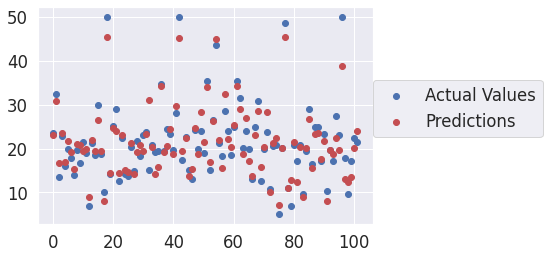

In [145]:
fig,ax=plt.subplots()
x=np.arange(0,len(df))
ax.scatter(x,df["actual values"],color="b",label="Actual Values")
ax.scatter(x,df["predictions"],color="r",label="Predictions")
ax.legend(loc=(1,.4)) #position of the legend

# **Mean Squared Error (MS)**

In [146]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
mse   #MSE will always be higher than your MAE because it squares the errors rather than only taking the absolute difference into account

9.242328990196082

R^2 is similar to accuracy, it gives a quick indication of how well your model is doing. Generally the close your R^2 number is to 1, the better the model. But it doesn't really mean exactly how wrong your model is, in terms of how far off each prediction is. 

MAE gives a better indication of how far each of your models predictions are on average. As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values it amplifies larger differences. 

# **Using the Scoring Parameter**

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier(n_estimators=100)


In [148]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5)

In [149]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
np.mean(cv_acc)

0.8248087431693989

In [151]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="precision")

In [152]:
cv_acc

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [153]:
np.mean(cv_acc)

0.8329547346025924

In [154]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")

In [155]:
np.mean(cv_acc)

0.8248087431693989

In [156]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_acc)

0.8545454545454545

In [157]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_acc)

0.8426854603423346

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]
model=RandomForestRegressor(n_estimators=100)

In [159]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [160]:
np.mean(cv_r2)

0.622375083951403

In [161]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_r2
np.mean(cv_r2)

-3.0314302853814783

In [162]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
cv_r2
np.mean(cv_r2)

-21.283214366686064

**Classification Functions**

In [163]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)

print("Classifier metrics on the Test set: ")
print("Accuracy: {}".format(accuracy_score(y_test,y_preds)*100))
print("Precision: {}".format(precision_score(y_test,y_preds)*100))
print("Recall: {}".format(recall_score(y_test,y_preds)*100))
print("F1-Score: {}".format(f1_score(y_test,y_preds)*100))

Classifier metrics on the Test set: 
Accuracy: 85.24590163934425
Precision: 84.84848484848484
Recall: 87.5
F1-Score: 86.15384615384615


# **Regression Metrics **

In [164]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print("Classifier metrics on the Test set: ")
print("R-Squared: {}".format(r2_score(y_test,y_preds)))
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_preds)))
print("Mean Square Error: {}".format(mean_squared_error(y_test,y_preds)))


Classifier metrics on the Test set: 
R-Squared: 0.8739690141174031
Mean Absolute Error: 2.1226372549019623
Mean Square Error: 9.242328990196082


# **Improving Prediction Through Experimentation (Hyperparameter Tuning)**

In [187]:
def evaluate_preds(y_true,y_preds):#Perform evaluation comparison on y_true labels vs y_pred labels
  np.random.seed(42)  
  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  f1=f1_score(y_true,y_preds)

  metric_dict={"accuracy":round(accuracy,2),
               "precision":round(precision,2),
               "recall":round(recall,2),
               "f1":round(f1,2)}
  print("Accuracy: {}".format(accuracy*100))
  print("Precision: {}".format(precision))  
  print("Recall: {}".format(recall))  
  print("F1 Score: {}".format(f1))    

  return metric_dict

In [214]:
def evaluate_preds(y_true,y_preds):#Perform evaluation comparison on y_true labels vs y_pred labels
  np.random.seed(42)  
  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  f1=f1_score(y_true,y_preds)

  metric_dict={"accuracy":round(accuracy,2),
               "precision":round(precision,2),
               "recall":round(recall,2),
               "f1":round(f1,2)}
  print("Accuracy: {}".format(accuracy*100))
  print("Precision: {}".format(precision))  
  print("Recall: {}".format(recall))  
  print("F1 Score: {}".format(f1))    

  return metric_dict


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data

heart_disease=heart_disease.sample(frac=1)
#split into X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data into train,validation, test sets

train_split=round(.7*len(heart_disease)) #70 percent of data will go for the train split
valid_split=round(train_split+.15*len(heart_disease)) #15 percent of data
X_train,y_train=X[:train_split],y[:train_split] #[:train_split] means take all data up to train_split
X_valid,y_valid=X[valid_split:],y[valid_split:]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds=clf.predict(X_valid)

#evaluate the classifier

baseline_metrics=evaluate_preds(y_valid,y_preds)


Accuracy: 86.95652173913044
Precision: 0.8214285714285714
Recall: 0.9583333333333334
F1 Score: 0.8846153846153847


# Let's try and improve the results

We'll change 1 of the parameteres,N_estimators to 100 and see if it improves

In [217]:
np.random.seed(42)
#Create a second Classifier

clf_2=RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train,y_train)

#make the prediction

y_preds_2=clf_2.predict(X_valid)

#Evaluate the 2nd Classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds)

Accuracy: 86.95652173913044
Precision: 0.8214285714285714
Recall: 0.9583333333333334
F1 Score: 0.8846153846153847


# **Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [224]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [225]:
rs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [226]:
#make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test) #rs=randomized search #preds =predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy: 83.60655737704919
Precision: 0.7837837837837838
Recall: 0.9354838709677419
F1 Score: 0.8529411764705881


# **Hyperparameter tuning with GridSearchCV**

In [227]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [228]:
grid_2 = {"n_estimators": [1200, 1500, 2000],
        "max_depth": [None, 5, 10],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [4, 6],
        "min_samples_leaf": [1, 2, 4]}
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   2.5s
[CV] max_depth=None, max_

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 23.0min finished


In [232]:
gs_clf.best_params_

gs_y_preds=gs_clf.predict(X_test)

gs_metrics=evaluate_preds(y_test,gs_y_preds)


Accuracy: 83.60655737704919
Precision: 0.7837837837837838
Recall: 0.9354838709677419
F1 Score: 0.8529411764705881


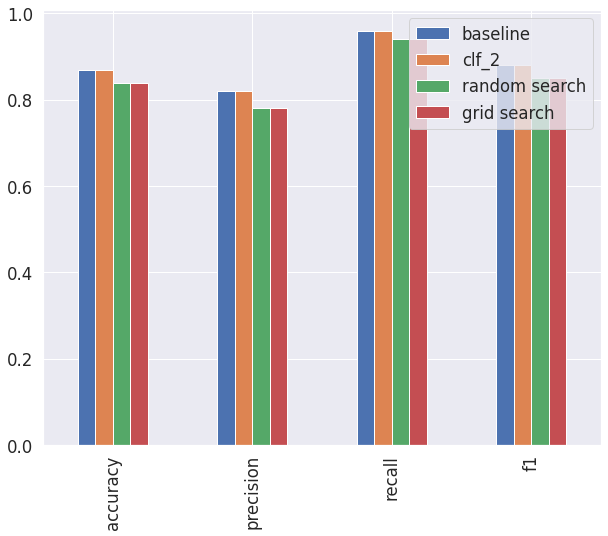

In [233]:
#Let's create a dataframe to compare the difference metrics
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search":rs_metrics,
                              "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

# **Saving and loading trained Machine Learning Models**

In [234]:
import pickle 
#Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [ ]:
#load a saved Model

In [235]:
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [237]:
#Make Predictions and evaluate loaded model
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy: 83.60655737704919
Precision: 0.7837837837837838
Recall: 0.9354838709677419
F1 Score: 0.8529411764705881


{'accuracy': 0.84, 'f1': 0.85, 'precision': 0.78, 'recall': 0.94}